
___
# Logistic Regression Project 

In this project i'll be working with a fake advertising data set, indicating whether or not a particular internet user clicked on an Advertisement. I'll will try to create a model that will predict whether or not they will click on an ad based off the features of that user.

This data set contains the following features:

* 'Daily Time Spent on Site': consumer time on site in minutes
* 'Age': cutomer age in years
* 'Area Income': Avg. Income of geographical area of consumer
* 'Daily Internet Usage': Avg. minutes a day consumer is on the internet
* 'Ad Topic Line': Headline of the advertisement
* 'City': City of consumer
* 'Male': Whether or not consumer was male
* 'Country': Country of consumer
* 'Timestamp': Time at which consumer clicked on Ad or closed window
* 'Clicked on Ad': 0 or 1 indicated clicking on Ad

## Import Libraries



In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [84]:
ad_data = pd.read_csv('advertising.csv')
ad_data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


Lets check out our data with info() and describe()

In [85]:
ad_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


so we got 1000 entries and 10 coloumns. 

In [86]:
ad_data.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


This only displays the numerical coloumns as you cant do statistics on text.
For age we can see that the age span from 19 to 61 and the average is 36 years. 
the income spans from 14k to 79,5k so thats a very big span! 

half our users are male and half clicked. 
Also users spend average 3 hours a day on the internet and a max of 4,5 hours.

## Exploratory Data Analysis

Let's visualize it!

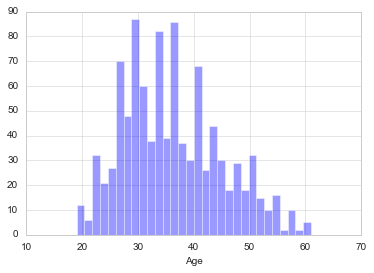

In [87]:
sns.distplot(ad_data['Age'],bins = 30,kde = False)


As we saw in the describe() this shows how our users are of dirrent age and most of our users are between 25-35

Lets look at Age versus Area income

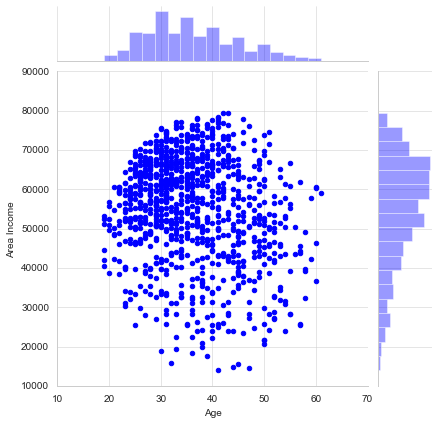

In [88]:
sns.jointplot(x='Age',y='Area Income',data = ad_data)

we can see the data is most dense in a agespan of 20-40 and an income of over 50k. this looks like 50% of our users. 

** Lets look at Age vs how much time they spent on a different plot, a so called KDE plot**

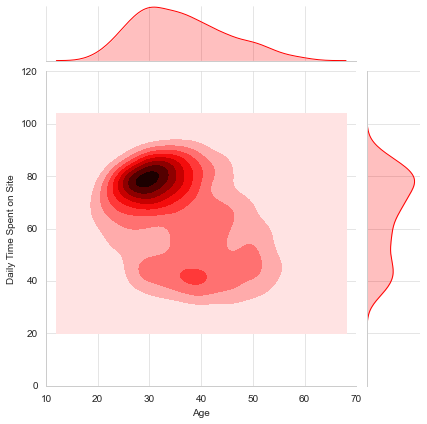

In [89]:
sns.jointplot(x='Age',y='Daily Time Spent on Site',data = ad_data, kind='kde',color = 'r')

This shows like the plot before, the same quadrant is super dense. Most time spent is in top left quadrant.

** Lets check out'Daily Time Spent on Site' vs. 'Daily Internet Usage'**

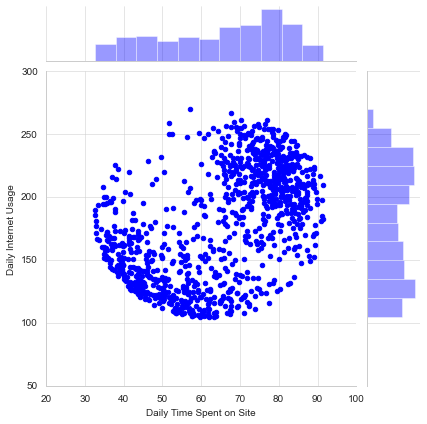

In [90]:
sns.jointplot(x='Daily Time Spent on Site',y='Daily Internet Usage',data = ad_data)

this is interesting. This almost looks like 2 groups, but its not splitted down the middle.
It shows in the top right, that the more time spent on site = more daily internet usage, which makes sense. 

** Now lets look at everything plotted against eachother to find trends. We do this with a pairplot. 
We split the data on whether the user clicked on the ad or not.


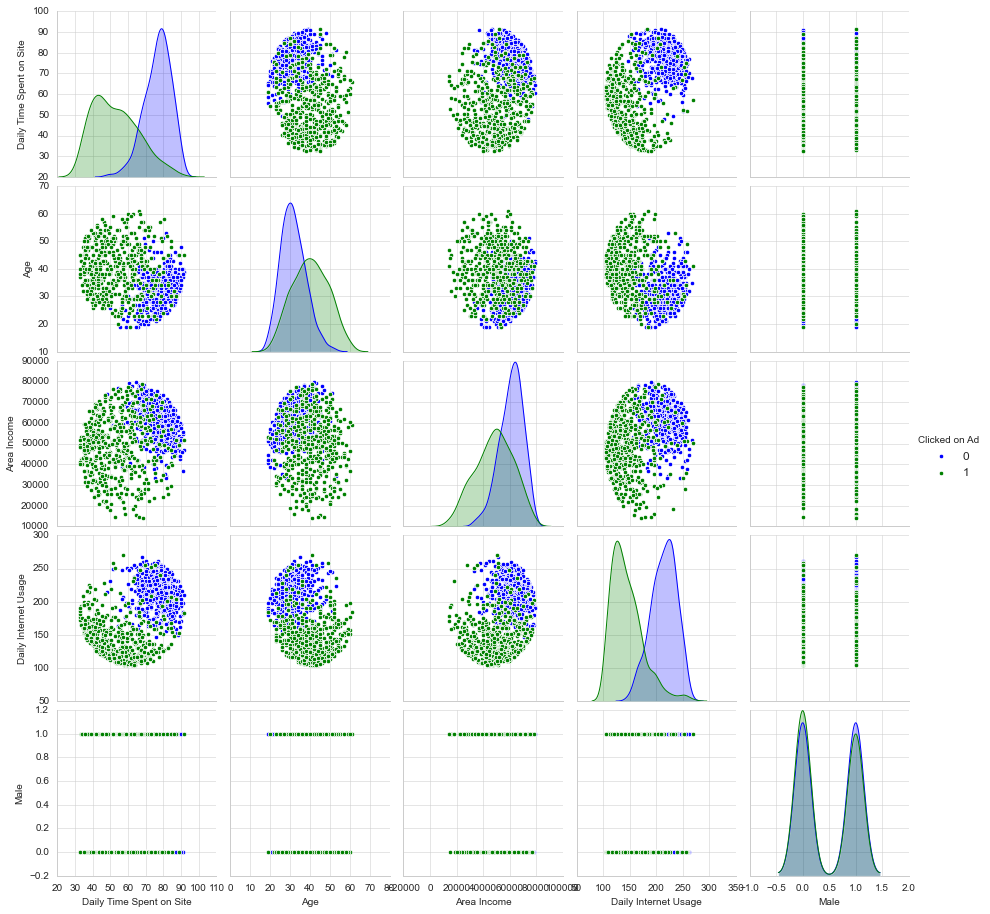

In [91]:
sns.pairplot(ad_data,hue = 'Clicked on Ad')

Green being "clicked" and blue being "not clicked.
if we look at "daily internet usage" it looks like the mroe time they spend on the internet the less likely they are to click the ad.

# Logistic Regression

Now it's time to do a train test split, and train our model! 
but first lets drop the columns that doesnt make sense for our our model.
Lets see if it does make sense to look at cities, ad topic line or country. For this to make sense we should have a max of 10 different to see a trend

In [93]:
Country = ad_data['Country'].nunique()
City = ad_data['City'].nunique()
AdTopic = ad_data['Ad Topic Line'].nunique()
print(Country)
print(City)
print(AdTopic)

237
969
1000


ok, so they were not workable. lets drop them.

In [94]:
ad_data.drop(['Ad Topic Line','Country','City'], axis = 1, inplace = True) #axis 1 cause its columns.

In [95]:
ad_data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,0,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,1,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,0,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,1,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,0,2016-06-03 03:36:18,0


Now what we got back are all numericals.  what could be interesting to look at is the Timestamp, to see if there's a time of the day people are morelikely to click the ad. For that we need to make a new column called hours.

we do this with a lambda function since it looks like same format. We could have used datetime format, but we are only interested in hours.


In [96]:
ad_data['Hours']= ad_data['Timestamp'].apply(lambda x: x.split(' ')[1].split(':')[0])
ad_data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Timestamp,Clicked on Ad,Hours
0,68.95,35,61833.90,256.09,0,2016-03-27 00:53:11,0,00
1,80.23,31,68441.85,193.77,1,2016-04-04 01:39:02,0,01
2,69.47,26,59785.94,236.50,0,2016-03-13 20:35:42,0,20
3,74.15,29,54806.18,245.89,1,2016-01-10 02:31:19,0,02
4,68.37,35,73889.99,225.58,0,2016-06-03 03:36:18,0,03


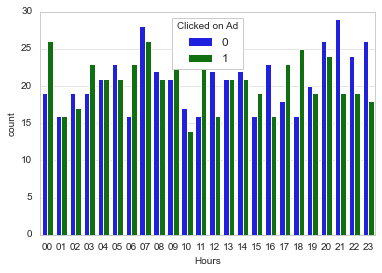

In [97]:
sns.countplot(x='Hours',data = ad_data,hue = 'Clicked on Ad')

So it doesnt look like there is any correlation at all between these two. But maybe we can see a trend when our prime group is online (25-40 years of age)

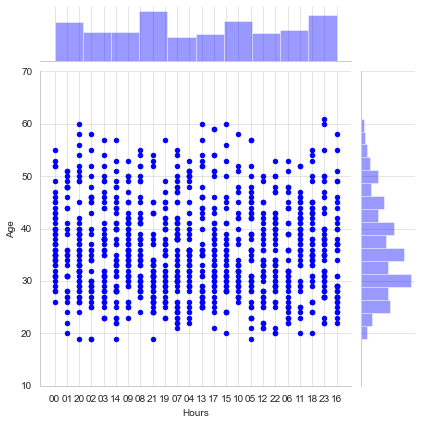

In [98]:
sns.jointplot(x='Hours',y='Age',data = ad_data)

Again this doesnt really look there is any correlation, so lets just drop the timestamp column as well, before we do the regression. 

In [99]:
ad_data.drop(['Timestamp','Hours'], axis = 1, inplace = True)
ad_data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
0,68.95,35,61833.90,256.09,0,0
1,80.23,31,68441.85,193.77,1,0
2,69.47,26,59785.94,236.50,0,0
3,74.15,29,54806.18,245.89,1,0
4,68.37,35,73889.99,225.58,0,0


Now its time. Since we want to see if they click on the ad or not, we split the "clicked on ad" column from the rest, to leave the ML to guess if they clicked or not. we split the dataset as 70% train and 30% test

In [105]:
from sklearn.model_selection import train_test_split
x = ad_data.drop(['Clicked on Ad'], axis = 1)
y = ad_data['Clicked on Ad']

In [106]:
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.30, 
                                                    random_state=101)

Lets train our model with the data!

In [107]:
from sklearn.linear_model import LogisticRegression

In [109]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression()

## Predictions and Evaluations


In [110]:
predictions = logmodel.predict(X_test)

And now for the results:

In [111]:
from sklearn.metrics import classification_report

In [112]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.91      0.95      0.93       157
           1       0.94      0.90      0.92       143

    accuracy                           0.93       300
   macro avg       0.93      0.93      0.93       300
weighted avg       0.93      0.93      0.93       300



We end up with pretty good accuracy i would say.